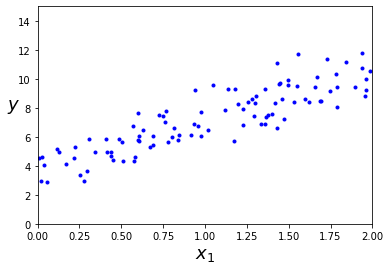

[[3.78923389]
 [3.35632913]]
[[ 3.78923389]
 [10.50189215]]


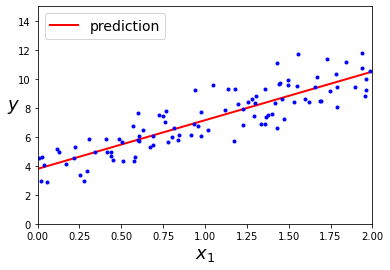

In [27]:
# 관련 라이브러리
import numpy as np 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1) ## 랜덤으로 100개의 데이터를 생성
y = 4 + 3 * X + np.random.randn(100, 1) ## 선형회귀
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18) 
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
#(1) 화면 출력 확인

### 정규 방정식을 사용한 선형회귀 접근 ###
X_b = np.c_[np.ones((100, 1)), X] # 두 개의 1차원 벡터를 세로로 붙여 2차원 배열 만들기
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) ## 역행렬 구하기, 정규방정식으로 cost를 최소화
print(theta_best)
# (2) theta_best 출력 확인

## theta_best를 통해 새로운 데이터(y_predict) 예측
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] 
y_predict = X_new_b.dot(theta_best)
print(y_predict)
# (3) y_predict 출력 확인

## 그래프로 시각화
plt.plot(X_new, y_predict, "r-", linewidth=2, label="prediction")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()
#(4) 화면 출력 확인

In [36]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X, y) ## 선형회귀에 X, y fitting
print(lin_reg.intercept_, lin_reg.coef_)
# (5) lin_reg.intercept_, lin_reg.coef_ 출력 확인

print(lin_reg.predict(X_new)) ## X_new를 통한 새로운 예측값 출력
# (6) lin_reg.predict(X_new) 출력 확인

[3.78923389] [[3.35632913]]
[[ 3.78923389]
 [10.50189215]]
[[3.78923389]
 [3.35632913]]


In [37]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6) ## 최소자승해 구하기
print(theta_best_svd)
# (7) theta_best_svd 출력 확인

# (8) np.linalg.pinv(X_b).dot(y) 출력 확인
print(np.linalg.pinv(X_b).dot(y)) ## 유사 역행렬 구하기

[[3.78923389]
 [3.35632913]]
[[3.78923389]
 [3.35632913]]


In [41]:
### 경사 하강법을 사용한 선형회귀 접근 ###
## gradient를 계산하여 cost를 최소화도록 진행
n_iterations = 1000
m = 100
eta = 0.1
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
print(theta)
# (9) theta 출력 확인
print(X_new_b.dot(theta))
# (10) X_new_b.dot(theta) 출력 확인


[[3.78923389]
 [3.35632913]]
[[ 3.78923389]
 [10.50189215]]


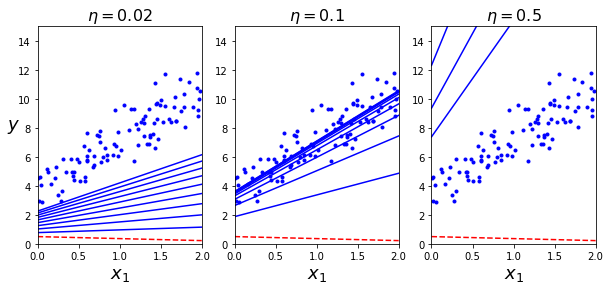

In [48]:
## theta를 통해 경사하강법을 진행
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
  m = len(X_b)
  plt.plot(X, y, "b.")
  n_iterations = 1000
  for iteration in range(n_iterations):
    if iteration < 10:
      y_predict = X_new_b.dot(theta)
      style = "b-" if iteration > 0 else "r--" 
      plt.plot(X_new, y_predict, style)
      gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
      theta = theta - eta * gradients
      if theta_path is not None: 
          theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
np.random.seed(42)
theta = np.random.randn(2,1)
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd) 
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()
# (11) 화면 출력 확인
## 학습률을 적절히 조절하지 못하면
## 왼쪽처럼 시간이 매우 오래걸리거나
## 오른쪽처럼 발산할 수 있다.


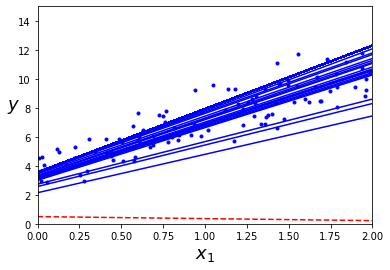

[[3.79174344]
 [3.34173927]]


In [50]:
### 스토캐스틱 경사 하강법을 사용한 선형회귀 접근 ###
## 매 스텝에서 전체 훈련 데이터를 모두 보고 gradient를 계산하기 때문에 훈련 데이터가 많을 수록 느려지기 때문에 데이터가 크면 SGD 사용 고려
## SGD는 랜덤으로 샘플을 선택하여 gradient를 계산하기 때문에 훨씬 빠름
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50

## 학습률을 계속 감소시키면서 학습
def learning_schedule(t):
 return t0 / (t + t1)
theta = np.random.randn(2,1)
for epoch in range(n_epochs):
 for i in range(m):
  if epoch == 0 and i < 20:
    y_predict = X_new_b.dot(theta)
    style = "b-" if i > 0 else "r--"
  plt.plot(X_new, y_predict, style)
  random_index = np.random.randint(m)
  xi = X_b[random_index:random_index+1]
  yi = y[random_index:random_index+1]
  gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(epoch * m + i)
  theta = theta - eta * gradients
  theta_path_sgd.append(theta)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()
print(theta)
# (12) 화면 출력 확인
# (13) theta 출력 확인

In [51]:
## SGD를 통하여 확률적 경사하강법 사용
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
print(f"sgd_reg.fit(X, y.ravel()) : {sgd_reg.fit(X, y.ravel())}")
print(f"sgd_reg.intercept_ : {sgd_reg.intercept_}")
print(f"sgd_reg.coef_ : {sgd_reg.coef_}")
# (14) sgd_reg.fit(X, y.ravel()) 출력 확인
# (15) sgd_reg.intercept_, sgd_reg.coef_ 출력 확인


sgd_reg.fit(X, y.ravel()) : SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=50,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
sgd_reg.intercept_ : [3.7456493]
sgd_reg.coef_ : [3.28341774]


In [52]:
### 미니배치 경사 하강법을 사용한 선형회귀 접근 ###
## 배치사이즈를 작게 하여 gradient를 계산함
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1)
t0, t1 = 200, 1000
def learning_schedule(t):
 return t0 / (t + t1)
t = 0
for epoch in range(n_iterations):
 shuffled_indices = np.random.permutation(m)
 X_b_shuffled = X_b[shuffled_indices]
 y_shuffled = y[shuffled_indices]
 for i in range(0, m, minibatch_size):
  t += 1
  xi = X_b_shuffled[i:i+minibatch_size]
  yi = y_shuffled[i:i+minibatch_size]
  gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
  eta = learning_schedule(t)
  theta = theta - eta * gradients
  theta_path_mgd.append(theta)
print(theta)
# (16) theta 출력 확인

[[3.79165485]
 [3.37922811]]


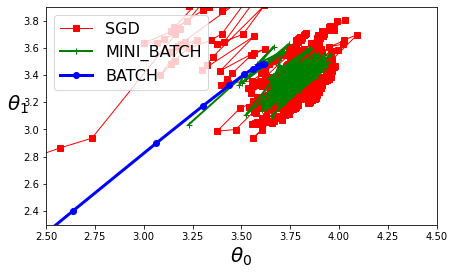

In [57]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MINI_BATCH")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="BATCH")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$ ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()
# (17) 화면 출력 확인
## Batch는 안정적으로 수렴하지만 속도가 느리다
## SGD는 매우 불안정하지만 속도가 빠르다
## MINI_BATCH는 두 가지의 방법의 중간정도이다